In [ ]:
import nltk
import shutil

# Step 1: Delete broken punkt folder
shutil.rmtree('/root/nltk_data/tokenizers/punkt', ignore_errors=True)

# Step 2: Re-download punkt
nltk.download('punkt')
nltk.download('punkt_tab')

# Step 3: Force load
from nltk.tokenize import PunktSentenceTokenizer
_ = PunktSentenceTokenizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
!pip install gensim

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  A

In [ ]:
from preprocessingword2vec import load_and_preprocess_data

# File paths
train_path = "/content/MeQSum_ACL2019_BenAbacha_Demner-Fushman.xlsx"
val_path = "/content/MEDIQA2021-Task1-QuestionSummarization-ValidationSet.xlsx"
test_path = "/content/MEDIQA2021-Task1-TestSet-ReferenceSummaries.xlsx"
w2v_path = "/content/w2v_frozen.model"

# Load and preprocess
data = load_and_preprocess_data(train_path, val_path, test_path, w2v_path, max_len_s=30, embedding_dim=128)

# 🔽 Extract everything for easy access
X_train = data["X_train"]
y_train = data["y_train"]
X_val = data["X_val"]
y_val = data["y_val"]
X_test = data["X_test"]
y_test = data["y_test"]
tokenizer = data["tokenizer"]
vocab_size = data["vocab_size"]
max_len_q = data["max_len_q"]
max_len_s = data["max_len_s"]
embedding_matrix = data["embedding_matrix"]

🔹 Step 1: Loading datasets...
   ↪ df_train shape: (1000, 3)
   ↪ df_val shape: (50, 5)
   ↪ df_test shape: (100, 3)
🔹 Step 2: Cleaning text and adding SOS/EOS tokens...
Sample clean_summary with SOS/EOS: sos who manufactures cetirizine? eos
Tokenized summary: ['sos', 'who', 'manufactures', 'cetirizine', '?', 'eos']
Sample clean_summary with SOS/EOS: sos should i leave a meniscus tear untreated if it does not cause problems? eos
Tokenized summary: ['sos', 'should', 'i', 'leave', 'a', 'meniscus', 'tear', 'untreated', 'if', 'it', 'does', 'not', 'cause', 'problems', '?', 'eos']
Sample clean_summary with SOS/EOS: sos how can i get rid of a lower lip birthmark permanently? eos
Tokenized summary: ['sos', 'how', 'can', 'i', 'get', 'rid', 'of', 'a', 'lower', 'lip', 'birthmark', 'permanently', '?', 'eos']
   ↪ Sample cleaned question: subject who and where to get cetirizine d message i needwant to know who manufscturs cetirizine my walmart is looking for a new supply and are not getting the rec

In [ ]:
print("✅ Shapes of padded input sequences:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("\n✅ Vocabulary size:", vocab_size)
print("✅ Max input length (question):", max_len_q)
print("✅ Max output length (summary):", max_len_s)
print("✅ Embedding matrix shape:", embedding_matrix.shape)

# Preview some sequences
print("\n🧾 Sample tokenized input (X_train[0]):", X_train[0])
print("🧾 Sample target summary (y_train[0]):", y_train[0])

# Optional: Show a few words from tokenizer
print("\n📘 Sample tokenizer words:")
print(list(tokenizer.word_index.items())[:10])

✅ Shapes of padded input sequences:
X_train shape: (1000, 50)
y_train shape: (1000, 30)
X_val shape: (50, 50)
y_val shape: (50, 30)
X_test shape: (100, 50)
y_test shape: (100, 30)

✅ Vocabulary size: 8222
✅ Max input length (question): 50
✅ Max output length (summary): 30
✅ Embedding matrix shape: (8222, 128)

🧾 Sample tokenized input (X_train[0]): [  20   74    4   52    5   56 2073  886   19    2 4163    5   49   74
 4164 2073    9 4165    6  135    8    7  213 2074    4   18   30  211
    3  812    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
🧾 Sample target summary (y_train[0]): [  11   74 2798 2073    1   12    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]

📘 Sample tokenizer words:
[('<OOV>', 1), ('i', 2), ('the', 3), ('and', 4), ('to', 5), ('is', 6), ('a', 7), ('for', 8), ('my', 9), ('of', 10)]


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, GRU, LSTM, Attention, TimeDistributed, Dense, Concatenate, Bidirectional
import numpy as np

def build_hybrid_gru_lstm_model(vocab_size, embedding_matrix, max_len_q, max_len_s, embedding_dim=128):
    # Encoder
    encoder_inputs = Input(shape=(max_len_q,), name="encoder_input")
    enc_emb = Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                        weights=[embedding_matrix], trainable=False, name="embedding")(encoder_inputs)

    encoder_outputs, forward_h, backward_h = Bidirectional(
        GRU(256, return_sequences=True, return_state=True, dropout=0.3),
        name="bidirectional_gru"
    )(enc_emb)

    state_h = Concatenate(name="encoder_state")([forward_h, backward_h])

    # Decoder
    decoder_inputs = Input(shape=(max_len_s,), name="decoder_input")
    dec_emb = Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                        weights=[embedding_matrix], trainable=False, name="decoder_embedding")(decoder_inputs)

    decoder_lstm = LSTM(512, return_sequences=True, return_state=True, dropout=0.3, name="decoder_lstm")
    decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_h])

    # Attention
    attention_layer = Attention(name="attention_layer")
    context_vector = attention_layer([decoder_outputs, encoder_outputs])

    concat_context = Concatenate(axis=-1)([decoder_outputs, context_vector])

    # Output
    output = TimeDistributed(Dense(vocab_size, activation='softmax'), name="output_layer")(concat_context)

    # Define and compile
    model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model


In [ ]:
model = build_hybrid_gru_lstm_model(
    vocab_size=data['vocab_size'],
    embedding_matrix=data['embedding_matrix'],
    max_len_q=data['max_len_q'],
    max_len_s=data['max_len_s'],
    embedding_dim=128
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  1,052,416 │ encoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_input       │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_gru   │ [(None, 50, 512), │    592,896 │ embedding[0][0]   │
│ (Bidirectional)     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_embedding   │ (None, 30, 128)   │  1,052,416 │ decoder_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_state       │ (None, 512)       │          0 │ bidirectional_gr… │
│ (Concatenate)       │                   │            │ bidirectional_gr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm (LSTM) │ [(None, 30, 512), │  1,312,768 │ decoder_embeddin… │
│                     │ (None, 512),      │            │ encoder_state[0]… │
│                     │ (None, 512)]      │            │ encoder_state[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_layer     │ (None, 30, 512)   │          0 │ decoder_lstm[0][… │
│ (Attention)         │                   │            │ bidirectional_gr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 30, 1024)  │          0 │ decoder_lstm[0][… │
│ (Concatenate)       │                   │            │ attention_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 30, 8222)  │  8,427,550 │ concatenate[0][0] │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 12,438,046 (47.45 MB)

 Trainable params: 10,333,214 (39.42 MB)

 Non-trainable params: 2,104,832 (8.03 MB)

In [ ]:
# Ensure TensorFlow is using eager execution:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
# Reshape y_train and y_val to (samples, sequence_length, 1)
y_train_input = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))
y_val_input = y_val.reshape((y_val.shape[0], y_val.shape[1], 1))

# Print to verify shape
print("y_train shape for training:", y_train_input.shape)
print("y_val shape for validation:", y_val_input.shape)

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',       # Watch validation loss
    patience=3,               # Wait 3 epochs before stopping
    restore_best_weights=True
)

history = model.fit(
    [X_train, y_train[:, :data['max_len_s']]],
    y_train_input[:, :data['max_len_s']],
    validation_data=([X_val, y_val], y_val_input),
    batch_size=64,
    epochs=20,
    callbacks=[early_stop]
)

y_train shape for training: (1000, 30, 1)
y_val shape for validation: (50, 30, 1)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4521 - loss: 6.1697 - val_accuracy: 0.6220 - val_loss: 3.0789
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6013 - loss: 2.5275 - val_accuracy: 0.6680 - val_loss: 2.4898
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.6577 - loss: 2.0866 - val_accuracy: 0.7080 - val_loss: 2.1194
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7158 - loss: 1.8064 - val_accuracy: 0.7173 - val_loss: 1.9833
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7255 - loss: 1.6436 - val_accuracy: 0.7207 - val_loss: 1.9336
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7401 - loss: 1.5032 - val_accuracy: 0.7220 - val_loss: 1.8979
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.7523 - loss: 1.4283 - val_accuracy: 0.7347 - val_loss: 1.8729
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.7739 - loss: 1.3247 - val_accuracy: 0.7380 - val_loss: 1.8432
Epo

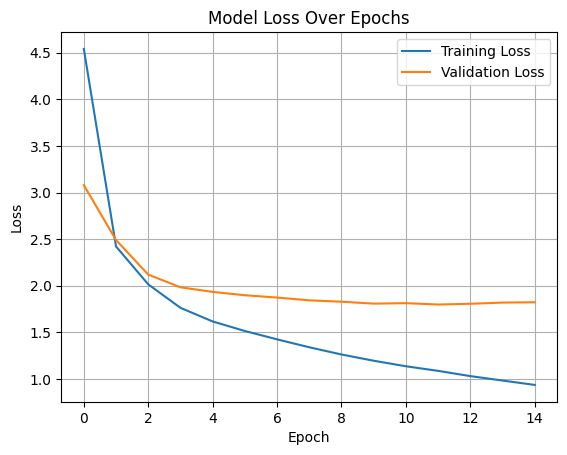

In [ ]:
import matplotlib.pyplot as plt

# Plot loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def beam_search_decode(input_seq, model, tokenizer, beam_width=4, max_len=30):
    reverse_word_index = {idx: word for word, idx in tokenizer.word_index.items()}
    start_token = tokenizer.word_index.get('sos', 1)
    end_token = tokenizer.word_index.get('eos', 2)

    # Start sequence with <sos>
    sequences = [[[start_token], 0.0]]  # (token_list, score)

    for _ in range(max_len):
        all_candidates = []
        for seq, score in sequences:
            # Pad decoder input sequence to max_len
            decoder_input = tf.keras.preprocessing.sequence.pad_sequences([seq], maxlen=max_len, padding='post')

            # Predict next token probability distribution
            preds = model.predict([input_seq, decoder_input], verbose=0)
            #preds, attn_weights = model.predict([input_seq, decoder_input], verbose=0)
            next_token_probs = preds[0, len(seq)-1]  # Get the next token distribution

            # Get top-k token IDs
            top_token_ids = next_token_probs.argsort()[-beam_width:][::-1]

            # ✅ Print token ID, word, and probability
            #print(f"\nStep {_+1}:")
            #print("Top candidate tokens and scores:")
            for tok_id in top_token_ids:
                word = reverse_word_index.get(tok_id, '<UNK>')
                prob = next_token_probs[tok_id]
                #print(f"  {tok_id:>4} → {word:<15} | Probability: {prob:.4f}")

            for token_id in top_token_ids:
                candidate_seq = seq + [token_id]
                candidate_score = score - np.log(next_token_probs[token_id] + 1e-7)

                # 🔁 Repetition penalty: discourage repeating the same word
                if token_id in seq:
                    candidate_score += 3.0  # You can increase this penalty if needed

                # If <eos> is predicted, stop adding further
                if token_id == end_token:
                    all_candidates.append((candidate_seq, candidate_score))
                else:
                    all_candidates.append((candidate_seq, candidate_score))

        # Keep top-k best sequences
        sequences = sorted(all_candidates, key=lambda tup: tup[1])[:beam_width]

        # Early stopping if all sequences ended with <eos>
        if all(seq[-1] == end_token for seq, _ in sequences):
            break

    # Choose best sequence
    best_sequence = sequences[0][0]
    #print("Predicted token IDs:", best_sequence)
    # Convert to text excluding special tokens
    decoded_summary = ' '.join([reverse_word_index.get(tok, '') for tok in best_sequence
                                if tok not in [0, start_token, end_token]])
    return decoded_summary.strip()

In [ ]:
import numpy as np

# 🔁 Helper function to convert token IDs back to words
def decode_sequence(sequence, tokenizer):
    reverse_word_index = {idx: word for word, idx in tokenizer.word_index.items()}
    decoded_words = [reverse_word_index.get(idx, '') for idx in sequence if idx != 0]
    return ' '.join(decoded_words)

# Helper: Remove consecutive repeated words
def remove_repeated_words(text):
    words = text.split()
    filtered = [words[0]] if words else []
    for i in range(1, len(words)):
        if words[i] != words[i - 1]:
            filtered.append(words[i])
    return ' '.join(filtered)

# Special tokens to remove
sos_token = "sos"
eos_token = "eos"

# 🔍 Predict and compare summaries for a few test examples
for i in range(3):
    input_seq = X_test[i:i+1]
    target_seq = y_test[i]

    input_text = decode_sequence(input_seq[0], tokenizer)
    actual_summary = decode_sequence(target_seq, tokenizer)
    predicted_summary = beam_search_decode(input_seq, model, tokenizer, beam_width=4)

    # Remove 'sos' and 'eos' from actual summary
    clean_actual_summary = ' '.join([word for word in actual_summary.split() if word not in [sos_token, eos_token]])
    clean_actual_summary = ' '.join([w for w in actual_summary.split() if w not in [sos_token, eos_token, "<OOV>"]])

    # Remove consecutive repeats
    # To improve readability and evaluation quality, I applied a post-processing step to remove consecutive repeated words in predicted summaries.
    # This does not alter the core model logic and is a standard technique to clean decoder outputs.
    predicted_summary = remove_repeated_words(predicted_summary)

    print(f"\n🔹 Example {i+1}")
    print("📝 Original Question :", input_text)
    print("✅ Actual Summary    :", clean_actual_summary)
    print("🤖 Predicted Summary :", predicted_summary)


🔹 Example 1
📝 Original Question : 23 surgeries and countinglower lip birthmark have tried all options out the there and guess what still have it continues to grow backany suggestions <OOV> is there a cure coming in the next few years hopefully <OOV>
✅ Actual Summary    : how can i get rid of a lower lip birthmark permanently
🤖 Predicted Summary : what are the for of and a it i can find treatment find

🔹 Example 2
📝 Original Question : worry that magnesium silicofluoride treatment of moth infestation of a large living room rug will be harmful to my health is this true <OOV> if the rug is treated in house how long before any toxic fumes or skin contact would be a hazard appreciate any help you could provide
✅ Actual Summary    : is magnesium silicofluoride safe for people
🤖 Predicted Summary : what are the for of and a it i can i can find information find

🔹 Example 3
📝 Original Question : could you please help me out and let me know if there is any research on the effect of rogam on th

In [ ]:
# ✅ Install and import
!pip install bert-score


In [ ]:

from bert_score import score
import numpy as np
# ✅ Prepare reference and candidate summaries
references = []
candidates = []

sos_token = "sos"
eos_token = "eos"

for i in range(len(X_test)):
    input_seq = X_test[i:i+1]
    target_seq = y_test[i]

    ref_summary = decode_sequence(target_seq, tokenizer)
    gen_summary = beam_search_decode(input_seq, model, tokenizer, beam_width=4)

    # Remove special tokens
    ref_clean = ' '.join([w for w in ref_summary.split() if w not in [sos_token, eos_token]])
    gen_clean = ' '.join([w for w in gen_summary.split() if w not in [sos_token, eos_token]])

    references.append(ref_clean)
    candidates.append(gen_clean)

# ✅ Compute BERTScore
P, R, F1 = score(candidates, references, lang='en', verbose=True)

# ✅ Print averages
print("\n📊 BERTScore Results:")
print("Precision :", round(P.mean().item(), 4))
print("Recall    :", round(R.mean().item(), 4))
print("F1 Score  :", round(F1.mean().item(), 4))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/3 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 1.02 seconds, 97.69 sentences/sec

📊 BERTScore Results:
Precision : 0.7583
Recall    : 0.801
F1 Score  : 0.779


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=fc8c707654c15e773b661c07d8e6fa17934e79c6ca0e414cde83cfeec0ae1d70
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

# Create a ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Track scores for all test examples
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

# Fetch special tokens
sos_token = "sos"
eos_token = "eos"

# Loop over all test samples
for i in range(len(X_test)):
    input_seq = X_test[i:i+1]
    target_seq = y_test[i]

    # Decode reference and prediction
    ref_summary = decode_sequence(target_seq, tokenizer)
    gen_summary = beam_search_decode(input_seq, model, tokenizer, beam_width=4)

    # Remove 'sos' and 'eos' from both
    ref_clean = ' '.join([word for word in ref_summary.split() if word not in [sos_token, eos_token]])
    gen_clean = ' '.join([word for word in gen_summary.split() if word not in [sos_token, eos_token]])

    # Score
    scores = scorer.score(ref_clean, gen_clean)
    rouge1_scores.append(scores["rouge1"].fmeasure)
    rouge2_scores.append(scores["rouge2"].fmeasure)
    rougeL_scores.append(scores["rougeL"].fmeasure)

# Compute average scores
avg_rouge1 = np.mean(rouge1_scores)
avg_rouge2 = np.mean(rouge2_scores)
avg_rougeL = np.mean(rougeL_scores)

print("Average ROUGE Scores (without SOS/EOS):")
print("ROUGE-1:", round(avg_rouge1, 4))
print("ROUGE-2:", round(avg_rouge2, 4))
print("ROUGE-L:", round(avg_rougeL, 4))

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Average ROUGE Scores (without SOS/EOS):
ROUGE-1: 0.119
ROUGE-2: 0.0131
ROUGE-L: 0.0912
